In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
initial_size = (20, 20)
output_size = (50, 50)

(0.0, 1.0)

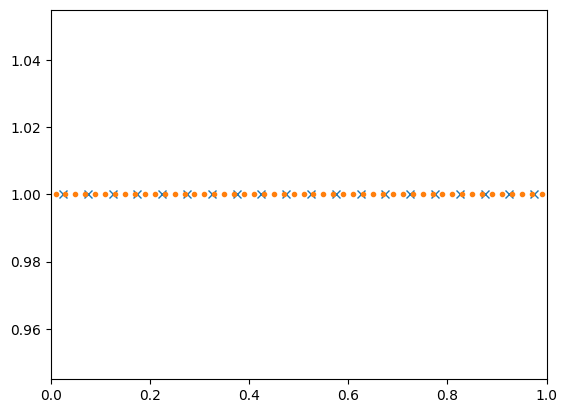

In [25]:
coordinates = np.linspace(0, 1, 21)[1:] - 1/40

new_coordinates = np.linspace(0, 1, 51)[1:] - 1/100

plt.plot(coordinates, np.ones_like(coordinates), 'x')

plt.plot(new_coordinates, np.ones_like(new_coordinates), '.')
plt.xlim([0,1])

In [5]:
import torch
def make_coord(shape, ranges=None, flatten=True):
    """ Make coordinates at grid centers.
    """
    coord_seqs = []
    for i, n in enumerate(shape):
        if ranges is None:
            v0, v1 = -1, 1
        else:
            v0, v1 = ranges[i]
        r = (v1 - v0) / (2 * n)
        seq = v0 + r + (2 * r) * torch.arange(n).float()
        coord_seqs.append(seq)
    ret = torch.stack(torch.meshgrid(*coord_seqs), dim=-1)
    if flatten:
        ret = ret.view(-1, ret.shape[-1])
    return ret

make_coord([3,3])

tensor([[-0.6667, -0.6667],
        [-0.6667,  0.0000],
        [-0.6667,  0.6667],
        [ 0.0000, -0.6667],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.6667],
        [ 0.6667, -0.6667],
        [ 0.6667,  0.0000],
        [ 0.6667,  0.6667]])

In [9]:
def generate_upsampling_vectors(start_resolution: tuple[int, int], end_resolution: tuple[int, int]) -> list[tuple[tuple[int, int], tuple[float, float]]]:
    # For each start resolution pixel, output the vector to the nearest end pixels

    start_coords = make_coord(start_resolution)
    print(start_coords)
    for end_x, end_y in make_coord(end_resolution):
        

        print(end_x, end_y)            


    pass

generate_upsampling_vectors([3,3], [5,5])

tensor([[-0.6667, -0.6667],
        [-0.6667,  0.0000],
        [-0.6667,  0.6667],
        [ 0.0000, -0.6667],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.6667],
        [ 0.6667, -0.6667],
        [ 0.6667,  0.0000],
        [ 0.6667,  0.6667]])
tensor(-0.8000) tensor(-0.8000)
tensor(-0.8000) tensor(-0.4000)
tensor(-0.8000) tensor(0.)
tensor(-0.8000) tensor(0.4000)
tensor(-0.8000) tensor(0.8000)
tensor(-0.4000) tensor(-0.8000)
tensor(-0.4000) tensor(-0.4000)
tensor(-0.4000) tensor(0.)
tensor(-0.4000) tensor(0.4000)
tensor(-0.4000) tensor(0.8000)
tensor(0.) tensor(-0.8000)
tensor(0.) tensor(-0.4000)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.4000)
tensor(0.) tensor(0.8000)
tensor(0.4000) tensor(-0.8000)
tensor(0.4000) tensor(-0.4000)
tensor(0.4000) tensor(0.)
tensor(0.4000) tensor(0.4000)
tensor(0.4000) tensor(0.8000)
tensor(0.8000) tensor(-0.8000)
tensor(0.8000) tensor(-0.4000)
tensor(0.8000) tensor(0.)
tensor(0.8000) tensor(0.4000)
tensor(0.8000) tensor(0.8000)


In [36]:
def generate_coords(resolution: int):
    return np.linspace(0,1,resolution+1)[1:] - 1/(2*resolution)

start_resolution = 4
end_resolution = 5

start_coords = generate_coords(start_resolution)
end_coords = generate_coords(end_resolution)
# coords = [0.25, 0.5, 0.75]

assignments = []
second_assignments = []
distances = []
next_distances = []

for coord in end_coords:
    nearest_pixel = int(np.floor(coord*start_resolution))
    vector_to_nearest_pixel = coord - start_coords[nearest_pixel]
    next_nearest_pixel = nearest_pixel + 1 if vector_to_nearest_pixel > 0 else nearest_pixel - 1

    assignments.append(nearest_pixel)
    second_assignments.append(next_nearest_pixel)
    distances.append(vector_to_nearest_pixel)
    next_distances.append(coord - start_coords[next_nearest_pixel] if next_nearest_pixel in range(start_resolution) else None)
    

print(start_coords)
print(end_coords)

print(assignments)
print(second_assignments)
print(distances)
print(next_distances)

[0.125 0.375 0.625 0.875]
[0.1 0.3 0.5 0.7 0.9]
[0, 1, 2, 2, 3]
[-1, 0, 1, 3, 4]
[-0.024999999999999994, -0.07499999999999996, -0.12499999999999989, 0.07500000000000007, 0.025000000000000022]
[None, 0.17500000000000004, 0.1250000000000001, -0.17499999999999993, None]


In [ ]:
# For each spatio-temporal coordinate (x, y, t), I will need to get the 8 (2 in each dimensions) latent codes that 
# I need to query as well as the distances (dx, dy, dt) to them, and run decoder(zstar, dx, dy, dt). Time is easy,
# because I am iterating over time, and dt is just my sampled tau.

# foreach x, y in end_pixel_indices:
#   x,y /= end_resolution
#   nearest_pixel_x, nearest_pixel_y = floor(x,y * start_resolution)
#   vector_to_nearest_pixel = coord - start_coords[nearest_pixel]

In [46]:
c = torch.rand(8, start_resolution)

c[:, assignments]
c[:, [i for i in second_assignments if i]]



IndexError: index 4 is out of bounds for dimension 0 with size 4

In [38]:
from itertools import product
from jaxtyping import Float
import numpy as np

def generate_coords_2d(resolution: tuple[int, int]) -> Float[np.ndarray, "X Y 2"]:
    a = generate_coords_1d(resolution[0])
    b = generate_coords_1d(resolution[1])
    A, B = np.meshgrid(a, b)

    # Flatten the arrays and pair them
    return np.array([A, B]).T


def generate_coords_1d(resolution: int) -> list[float]:
    return np.linspace(0,1,resolution+1)[1:] - 1/(2*resolution)

start_resolution = np.array([2,3])
end_resolution = np.array([4,5])
start_coords = generate_coords_2d(start_resolution)
end_coords = generate_coords_2d(end_resolution)

nearest_pixels = np.zeros((4, *end_resolution, 2))

skipped_coordinates = []

for i_end, j_end in product(range(end_resolution[0]), range(end_resolution[1])):
    end_coord = end_coords[i_end, j_end]
    nearest_pixel = np.floor(end_coord*start_resolution).astype(int)
    vector_from_nearest_start_to_end = end_coord - start_coords[nearest_pixel[0], nearest_pixel[1]]
    next_x, next_y = (vector_from_nearest_start_to_end > 0)*2-1

    # if nearest_pixel[0] + next_x not in range(end_resolution[0]) or nearest_pixel[1] + next_y not in range(end_resolution[1]):
    #     continue
    nearest_pixels[0, i_end, j_end] = nearest_pixel
    nearest_pixels[1, i_end, j_end] = np.array([nearest_pixel[0]+next_x, nearest_pixel[1]])
    nearest_pixels[2, i_end, j_end] = np.array([nearest_pixel[0], nearest_pixel[1]+next_y])
    nearest_pixels[3, i_end, j_end] = np.array([nearest_pixel[0]+next_x, nearest_pixel[1]+next_y])

# I want to output a vector a = [2,4,x,y] (dim, n_nearest, i_x, i_y) containing 
# all the assigned pixel indices, so that i can do latent_code[:, t, a[0], a[1]] 
# and get a tensor c of shape [C,4,x,y] of all the codes that I need. Then, I 
# need a tensor of vectors to those assigned indices, again of shape [2, i], that 
# I can concatenate it with c and get a tensor [C+2, I]. Then I also append tau 
# (which is constant across all Is) to get [C+3, I] which I can then run through 
# the decoding network
nearest_pixels.shape
nearest_pixels = nearest_pixels.astype(int)

In [11]:
latent_code = np.random.rand(8, 4, 5)
latent_code[:, nearest_pixels[0], nearest_pixels[1]].shape

(8, 4, 5, 2)

In [12]:
x_out_of_bounds = np.logical_or(nearest_pixels[..., 0] < 0, nearest_pixels[..., 0] >= start_coords.shape[0])
y_out_of_bounds = np.logical_or(nearest_pixels[..., 1] < 0, nearest_pixels[..., 1] >= start_coords.shape[1])
out_of_bounds = np.logical_or(x_out_of_bounds, y_out_of_bounds)
nearest_pixels[out_of_bounds] = 0

In [14]:
nearest_start_coords = start_coords[nearest_pixels[..., 0], nearest_pixels[..., 1]]

In [24]:
start_to_end_vectors = end_coords[None, :] - nearest_start_coords

In [26]:
start_to_end_vectors[0,1,1]

array([0.125     , 0.13333333])

In [28]:
nearest_pixels[0,1,1]

array([0, 0])

In [30]:
start_coords[0,0]

array([0.25      , 0.16666667])

In [32]:
end_coords[1,1]

array([0.375, 0.3  ])

In [66]:
from jaxtyping import Int, Bool


def get_upscaling_pixel_indices_and_distances(
    start_resolution: tuple[int, int], end_resolution: tuple[int, int]
) -> tuple[Int[np.ndarray, "4 XUpscaled YUpscaled 2"], Float[np.ndarray, "4 XUpscaled YUpscaled 2"], Bool[np.ndarray, "4 XUpscaled YUpscaled"]]:
    start_coords = generate_coords_2d(start_resolution)
    end_coords = generate_coords_2d(end_resolution)
    nearest_pixels = np.zeros((4, *end_resolution, 2))

    for i_end, j_end in product(range(end_resolution[0]), range(end_resolution[1])):
        end_coord = end_coords[i_end, j_end]
        nearest_pixel = np.floor(end_coord*start_resolution).astype(int)
        vector_from_nearest_start_to_end = end_coord - start_coords[nearest_pixel[0], nearest_pixel[1]]
        next_x, next_y = (vector_from_nearest_start_to_end > 0)*2-1

        # if nearest_pixel[0] + next_x not in range(end_resolution[0]) or nearest_pixel[1] + next_y not in range(end_resolution[1]):
        #     continue
        nearest_pixels[0, i_end, j_end] = nearest_pixel
        nearest_pixels[1, i_end, j_end] = np.array([nearest_pixel[0]+next_x, nearest_pixel[1]])
        nearest_pixels[2, i_end, j_end] = np.array([nearest_pixel[0], nearest_pixel[1]+next_y])
        nearest_pixels[3, i_end, j_end] = np.array([nearest_pixel[0]+next_x, nearest_pixel[1]+next_y])
    
    x_out_of_bounds = np.logical_or(nearest_pixels[..., 0] < 0, nearest_pixels[..., 0] >= start_coords.shape[0])
    y_out_of_bounds = np.logical_or(nearest_pixels[..., 1] < 0, nearest_pixels[..., 1] >= start_coords.shape[1])
    out_of_bounds = np.logical_or(x_out_of_bounds, y_out_of_bounds)
    nearest_pixels[out_of_bounds] = 0

    nearest_pixels = nearest_pixels.astype(int)


    nearest_start_coords = start_coords[nearest_pixels[..., 0], nearest_pixels[..., 1]]
    start_to_end_vectors = end_coords[None, :] - nearest_start_coords

    return nearest_pixels, start_to_end_vectors, out_of_bounds

In [68]:
start_resolution = (3,3)
end_resolution = (6,6)
nearest, vectors, out_of_bounds = get_upscaling_pixel_indices_and_distances(start_resolution, end_resolution)
start_coords = generate_coords_2d(start_resolution)
end_coords = generate_coords_2d(end_resolution)

print(nearest.shape)
print(vectors.shape)
print(out_of_bounds.shape)


(4, 6, 6, 2)
(4, 6, 6, 2)
(4, 6, 6)


In [98]:
vectors[0, 1,1]
current_start_coord[1, 1]

array([0.16666667, 0.16666667])

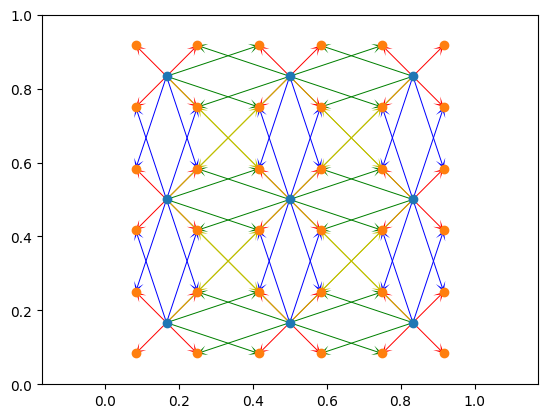

In [128]:
from matplotlib import pyplot as plt
flat_start = np.reshape(start_coords, (-1, 2))
flat_end = np.reshape(end_coords, (-1, 2))
plt.plot(flat_start[:, 0], flat_start[:,1], 'o')
plt.plot(flat_end[:, 0], flat_end[:,1], 'o')

colors = ['r', 'g', 'b', 'y']

for index, vector, invalid, color in zip(nearest, vectors, out_of_bounds, colors):
    vector = vector*(1-invalid[..., None])
    current_start_coord = start_coords[index[..., 0], index[..., 1]]
    
    plt.quiver(current_start_coord[..., 0], current_start_coord[..., 1], vector[..., 0], vector[..., 1], scale=1, scale_units='xy', color=color, width=0.002, headwidth=10,headlength=10)

plt.axis('equal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [ ]:
star